<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

In Lab 4.1.1 we were able to predict house price via a predictor variable from first principles. Here we the see how the same can be done using scikit-learn.

For comparison purposes, we will continue with the same predictor `sq__ft` in our dataset as last time.

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Read in the data

In [2]:
# Read CSV
house_csv = "../DATA/Sacramento_transactions.csv"
df = pd.read_csv(house_csv)

In [7]:
df.head(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [9]:
#question 1 (this is what you want right!?!?!?)
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


{'whiskers': [<matplotlib.lines.Line2D at 0x1a0d17cea90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a0d0e4ec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a0d17cd4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a0d185d8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a0d185e290>],
 'means': []}

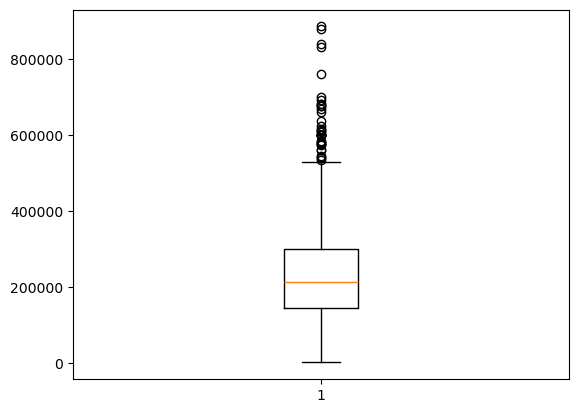

In [15]:
plt.boxplot(df['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a0d89562d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a0d8957f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a0d8955b90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a0d8971490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a0d8971e10>],
 'means': []}

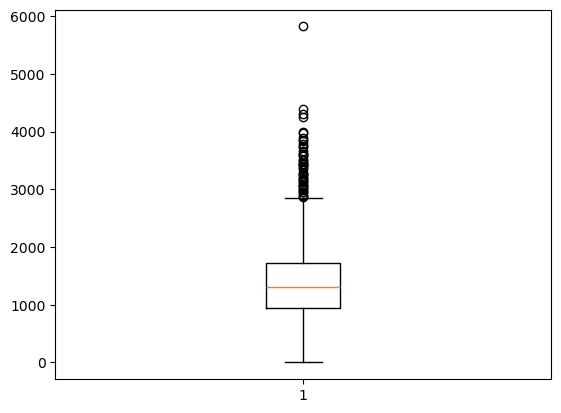

In [23]:
plt.boxplot(df['sq__ft'], whis=1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a0d503ebd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a0d50400d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a0d503e3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a0d5041410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a0d5041cd0>],
 'means': []}

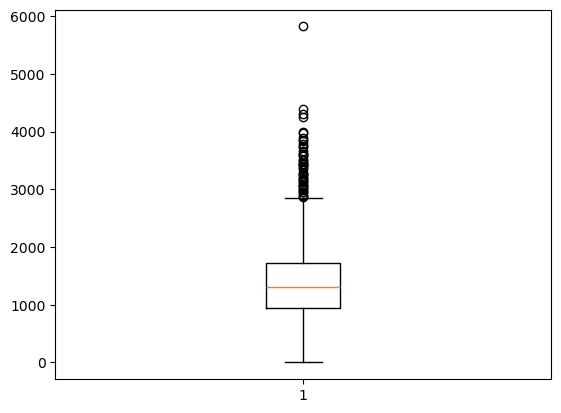

In [17]:
plt.boxplot(df['sq__ft'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a0d5cc7810>,
 'caps': [<matplotlib.lines.Line2D at 0x1a0d5cd0d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a0d5cc6dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a0d5cd1d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a0d5cd25d0>],
 'means': []}

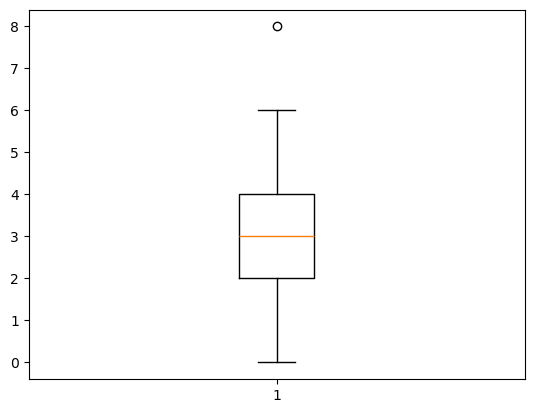

In [18]:
plt.boxplot(df['beds'])

In [ ]:
# question 2
#price is sensitive to outliers as our maximum is very high (800k) but our mean is 200k 
#sq ft looks as though it is also sensitive to outliers 1300 vs 5000 looking at both mean and standard devation
#beds looks good tho (?)

#slice out our outliers somehow???? and then make then NULL and then dropna to get rid of outliers

In [10]:
# summary statistcs are changed in teh mean as the mean is heavily affected by teh mean where as the median is not expected to change as much

NameError: name 'find_outliers_IQR' is not defined

### 2. Predict Price

We are going to predict the target variable `price` from `sq__ft` using sklearn's linear_model.

In [3]:
# import the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

Read up on the following methods and attributes here: [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- coef_
- intercept_
- fit()
- predict()
- score()

In [ ]:
#coef_ is teh coefficient which is the  the amount y changes for a unit increase in x
#intervept_ is the independant term
#fit for fit linear model
#predict using a linear model
#score return the coefficient of determination of the prediction.

#regression equasion is y = b_0 + b_1*x
#intercept is b_0 - when all variables are zero

#### 2.1 Create an instance of LinearRegression.

In [4]:
# ANSWER
model = LinearRegression()

#### 2.2 Fit predictor and target variables using linear regression

In [5]:
X = df['sq__ft'].values.reshape(-1,1)
y = df['price']

In [6]:
# ANSWER
fitted = model.fit(X, y)

#### 2.3. Using attributes of the LinearRegression() class find coefficient and intercept.

In [7]:
# ANSWER
print(model.coef_)
#for an increase in x how many changes in y must there be so multipled by 54 for a change in x

[54.15863969]


In [8]:
print(model.intercept_)
#when teh regression line crosses teh y axis

162930.16140699777


#### 2.4 Find R^2 Score

Find $R^2$ Using the ```score``` method of LinearRegression.

In [9]:
# ANSWER
model.score(X, y)
#the proportion of variation in y that explained by x, usually represented by percentage
#how the difference in one variable can be explained by the difference in another

0.11148717682951437

### 3. Splitting Data


Splitting the data into training and test sets is important in supervised learning.

- We ensure that the test set remains untouched during the model training process. This isolation prevents any information leakage about the test set into the training process.

- It allows us to evaluate the performance of our machine learning model on unseen data.


In [10]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Use the `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [11]:
X = df[['beds', 'baths', 'sq__ft']]
y = df['price']
#single square bracket is series but double is the whole df

In [12]:
# ANSWER
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [13]:
# ANSWER
## Check training/test data
X_train.shape


(659, 3)

In [14]:
y_test.shape

(326,)

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [15]:
# ANSWER
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
model.score(X_test, y_test)

0.16903116531564832

In [17]:
# ANSWER
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
r2 = r2_score(y_test, y_pred)
print('r2:', r2)

r2: 0.16903116531564832


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using the linear regression model.**

In [20]:
# ANSWER
y = model.coef_ + model.intercept_ * X
print(y)

              beds          baths        sq__ft
0    228081.807919  186167.846038  9.885585e+07
1    346330.418469  186167.846038  1.379961e+08
2    228081.807919  186167.846038  9.412590e+07
3    228081.807919  186167.846038  1.007478e+08
4    228081.807919  186167.846038  9.424415e+07
..             ...            ...           ...
980  464579.029019  422665.067137  2.696068e+08
981  346330.418469  304416.456587  1.746532e+08
982  346330.418469  304416.456587  1.437903e+08
983  464579.029019  304416.456587  1.992489e+08
984  346330.418469  304416.456587  1.610546e+08

[985 rows x 3 columns]


#### Find the error

In [21]:
# Predict price from X_test
y_preds = model.predict(X_test)

y_preds[:10]

array([178653.66192178, 372343.23475288, 249016.61691252, 306227.27010155,
       244543.3946422 , 118248.61054985, 237256.25516369, 239963.64101737,
       118248.61054985, 118248.61054985])

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds, squared=True)

18227689331.579136

### Conclusion
We have seen that through scikit-learn, minimal code is needed to implement and evaluate a linear regression model.



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



